# CNN Results Exploration

# Initial Model Comparison

## Training History

### Import 

In [1]:
import pandas as pd

# Load the CSV file 
file_path_EN = "../models/CNN_EfficientNet/checkpoints/training_history.csv"  
df_Efficient_Training = pd.read_csv(file_path_EN)

file_path_VGG = "../models/CNN_VGG/checkpoints/training_history.csv"  
df_VGG_Training = pd.read_csv(file_path_VGG)

file_path_RN = "../models/CNN_ResNet/checkpoints/training_history.csv"  
df_ResNet_Training = pd.read_csv(file_path_RN)

file_path_B = "../models/cnn_ryan/checkpoints/training_history.csv"  
df_bespoke_Training = pd.read_csv(file_path_B)


#### Exploration

#### Individual Line Plots for Accuracy and Loss

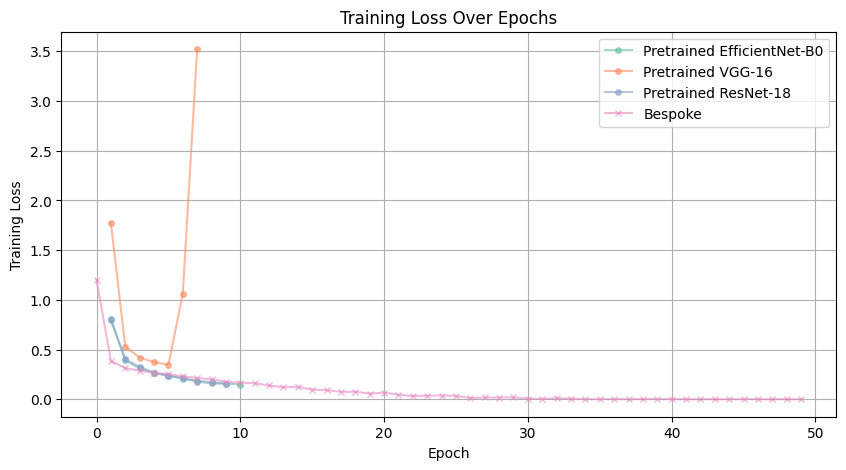

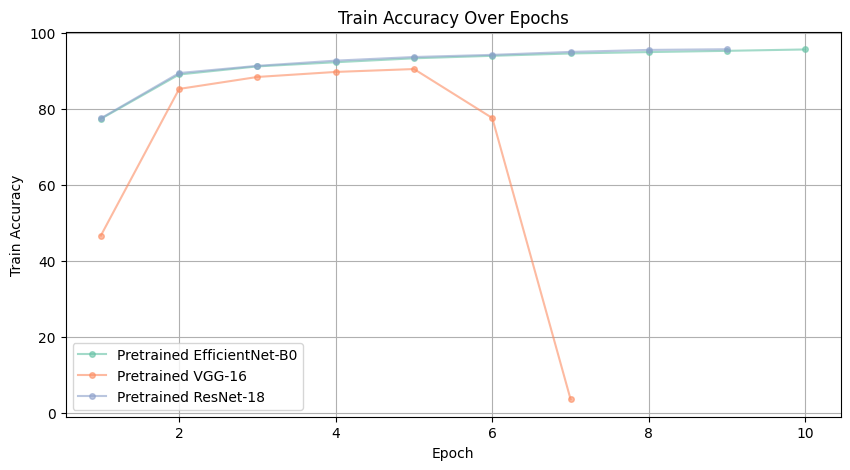

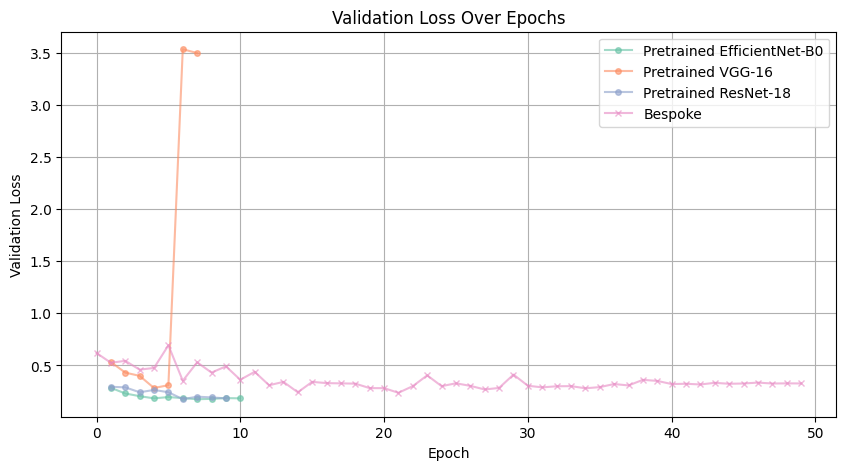

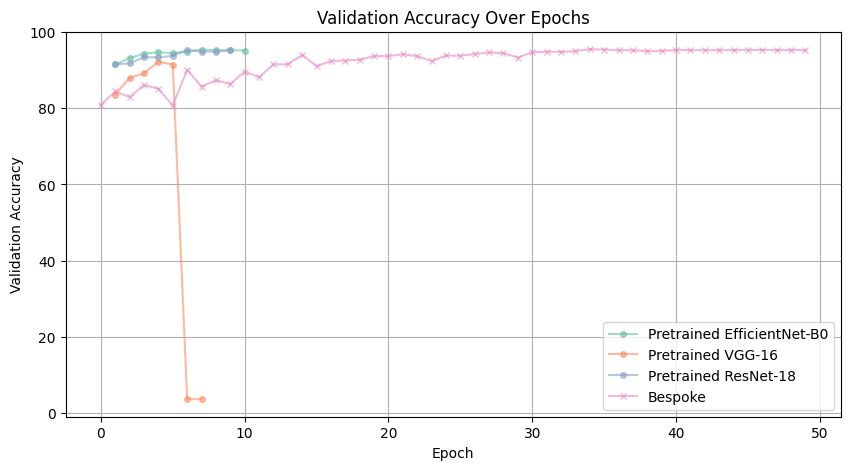

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

sns_colors = sns.color_palette("Set2", 5)
#colors = plt.get_cmap("viridis")(np.linspace(0, 1, 2)) 

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Loss"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Loss"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Loss"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Accuracy"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Accuracy"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Accuracy"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], label="Bespoke", marker="o", markersize=2, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Loss"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Loss"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Loss"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Loss"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# # Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Accuracy"], label="Pretrained EfficientNet-B0", marker="o", markersize=4, alpha=0.6, color=sns_colors[0])
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Accuracy"], label="Pretrained VGG-16", marker="o", markersize=4, alpha=0.6, color=sns_colors[1])
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Accuracy"], label="Pretrained ResNet-18", marker="o", markersize=4, alpha=0.6, color=sns_colors[2])
plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Accuracy"], label="Bespoke", marker="x", markersize=4, alpha=0.6, color=sns_colors[3])
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()


#### Summary Plots 

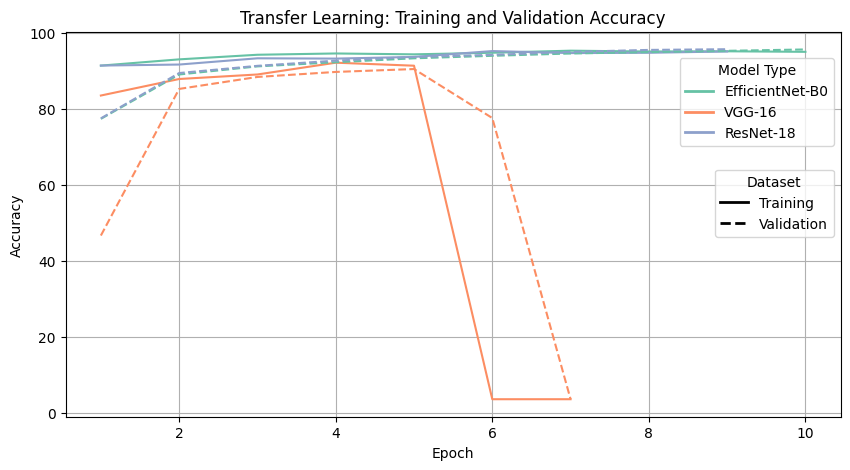

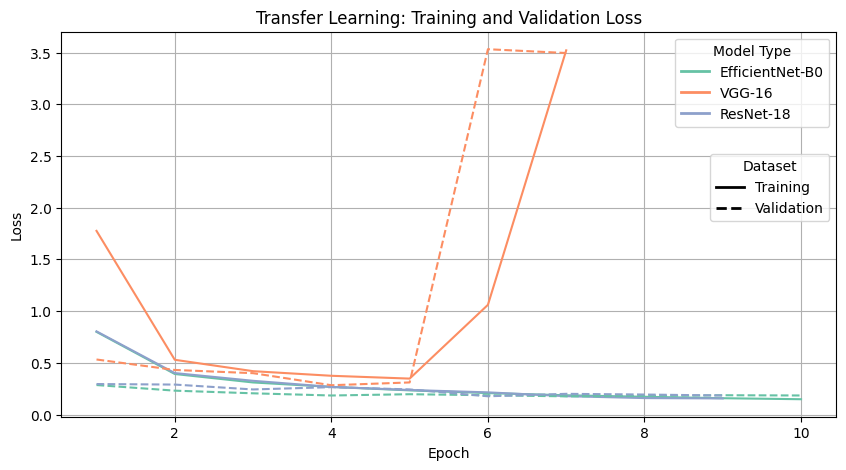

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

sns_colors = sns.color_palette("Set2", 4)

# Create legends
legend_models = [
    mlines.Line2D([], [], color=sns_colors[0], linewidth=2, label="EfficientNet-B0"),
    mlines.Line2D([], [], color=sns_colors[1], linewidth=2, label="VGG-16"),
    mlines.Line2D([], [], color=sns_colors[2], linewidth=2, label="ResNet-18"),
    #mlines.Line2D([], [], color=sns_colors[3], linewidth=2, label="Bespoke"),
]

legend_lines = [
    mlines.Line2D([], [], color="black", linewidth=2, linestyle="-", label="Training"),
    mlines.Line2D([], [], color="black", linewidth=2, linestyle="dashed", label="Validation"),
]

## Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Accuracy"], color=sns_colors[0], label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Accuracy"], color=sns_colors[1], label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Accuracy"], color=sns_colors[2], label="_nolegend_")
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Accuracy"], color=sns_colors[3], label="_nolegend_")
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Accuracy"], color=sns_colors[0], linestyle='dashed', label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Accuracy"], color=sns_colors[1], linestyle='dashed', label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Accuracy"], color=sns_colors[2], linestyle='dashed', label="_nolegend_")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Transfer Learning: Training and Validation Accuracy")
plt.grid()

legend1 = plt.legend(handles=legend_models, loc="upper right", title="Model Type", bbox_to_anchor=(1, 0.95))
legend2 = plt.legend(handles=legend_lines, loc="upper right", title="Dataset", bbox_to_anchor=(1, 0.66))
plt.gca().add_artist(legend1) 
plt.show()

## Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Train Loss"], color=sns_colors[0], label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Train Loss"], color=sns_colors[1], label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Train Loss"], color=sns_colors[2], label="_nolegend_")
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Train Loss"], color=sns_colors[3], label="_nolegend_")
plt.plot(df_Efficient_Training["Epoch"], df_Efficient_Training["Val Loss"], color=sns_colors[0], linestyle='dashed', label="_nolegend_")
plt.plot(df_VGG_Training["Epoch"], df_VGG_Training["Val Loss"], color=sns_colors[1], linestyle='dashed', label="_nolegend_")
plt.plot(df_ResNet_Training["Epoch"], df_ResNet_Training["Val Loss"], color=sns_colors[2], linestyle='dashed', label="_nolegend_")
#plt.plot(df_bespoke_Training["Epoch"], df_bespoke_Training["Val Loss"], color=sns_colors[3], linestyle='dashed', label="_nolegend_")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Transfer Learning: Training and Validation Loss")
plt.grid()

legend1 = plt.legend(handles=legend_models, loc="upper right", title="Model Type", bbox_to_anchor=(1, 1))
legend2 = plt.legend(handles=legend_lines, loc="upper right", title="Dataset", bbox_to_anchor=(1, 0.7))
plt.gca().add_artist(legend1)  
plt.show()



## Test Results

#### Import

In [4]:
# Define file path
EF_RESULTS_PATH = "../models/CNN_EfficientNet/results/test_results.txt"
EF_CONF_MATRIX_PATH = "../models/CNN_EfficientNet/results/confusion_matrix.csv"

VGG_RESULTS_PATH = "../models/CNN_VGG/results/test_results.txt"
VGG_CONF_MATRIX_PATH = "../models/CNN_VGG/results/confusion_matrix.csv"

RN_RESULTS_PATH = "../models/CNN_ResNet/results/test_results.txt"
RN_CONF_MATRIX_PATH = "../models/CNN_ResNet/results/confusion_matrix.csv"

### Classification Report
Precision, Recall & F1-Score

#### Import

In [5]:
import pandas as pd
import re
import os

# Parse test results txt file 
# Returns a DataFrame containing class-wise precision, recall, f1-score, and support.
def parse_classification_report(results_path):

    # Check if file exists
    if not os.path.exists(results_path):
        print(f"Error: File not found at {results_path}")
        return None

    # Read the test results file
    with open(results_path, "r") as f:
        test_results = f.readlines() 

    # Find where the classification report starts
    try:
        start_idx = next(i for i, line in enumerate(test_results) if "Classification Report:" in line) + 2
        end_idx = next(i for i, line in enumerate(test_results) if "Confusion Matrix" in line)
    except StopIteration:
        print(f"Error: Could not find classification report in {results_path}")
        return None

    # Extract classification report lines
    report_lines = test_results[start_idx:end_idx]

    # Clean up empty lines and strip whitespace
    report_lines = [line.strip() for line in report_lines if line.strip()]

    # Define expected columns
    columns = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    report_data = []

    # Process each line carefully
    for line in report_lines:
        parts = re.split(r'\s+', line.strip())

        # Handle special cases like "accuracy" that have fewer columns
        if len(parts) == 2:
            parts.insert(1, '') 
            parts.insert(2, '')
            parts.insert(3, '')

        # Ensure all rows have 5 columns
        if len(parts) == 5:
            report_data.append(parts)
        else:
            print(f"Skipping malformed row: {parts}") 

    # Convert into DataFrame
    df_report = pd.DataFrame(report_data, columns=columns)
    df_report.set_index("Class", inplace=True)  # Set class names as index

    # Convert numerical columns to float (except "Support", which is integer)
    for col in ["Precision", "Recall", "F1-Score"]:
        df_report[col] = pd.to_numeric(df_report[col], errors="coerce")

    df_report["Support"] = pd.to_numeric(df_report["Support"], errors="coerce", downcast="integer")

    return df_report


In [6]:
test_results_EF = parse_classification_report(EF_RESULTS_PATH)
test_results_VGG = parse_classification_report(VGG_RESULTS_PATH)
test_results_RN = parse_classification_report(RN_RESULTS_PATH)

# fix index issue
test_results_EF = test_results_EF.reset_index().rename(columns={"index": "Class"})
test_results_VGG = test_results_VGG.reset_index().rename(columns={"index": "Class"})
test_results_RN = test_results_RN.reset_index().rename(columns={"index": "Class"})

Skipping malformed row: ['accuracy', '0.95', '11005']
Skipping malformed row: ['macro', 'avg', '0.94', '0.94', '0.94', '11005']
Skipping malformed row: ['weighted', 'avg', '0.95', '0.95', '0.95', '11005']
Skipping malformed row: ['accuracy', '0.91', '11005']
Skipping malformed row: ['macro', 'avg', '0.91', '0.90', '0.91', '11005']
Skipping malformed row: ['weighted', 'avg', '0.92', '0.91', '0.91', '11005']
Skipping malformed row: ['accuracy', '0.95', '11005']
Skipping malformed row: ['macro', 'avg', '0.95', '0.94', '0.94', '11005']
Skipping malformed row: ['weighted', 'avg', '0.95', '0.95', '0.95', '11005']


In [7]:
test_results_EF = test_results_EF.reset_index().rename(columns={"index": "Class"})
test_results_VGG = test_results_VGG.reset_index().rename(columns={"index": "Class"})
test_results_RN = test_results_RN.reset_index().rename(columns={"index": "Class"})
print(test_results_EF.index)
print(test_results_VGG.index)
print(test_results_RN.index)

RangeIndex(start=0, stop=35, step=1)
RangeIndex(start=0, stop=35, step=1)
RangeIndex(start=0, stop=35, step=1)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Combine all models into one DataFrame for easier visualization
test_results_EF["Model"] = "EfficientNet"
test_results_VGG["Model"] = "VGG16"
test_results_RN["Model"] = "ResNet18"

df_all_models = pd.concat([test_results_EF, test_results_VGG, test_results_RN], ignore_index=True)
df_all_models.columns = ['Class_Number', 'Class', 'Precision', 'Recall', 'F1-Score', 'Support', 'Model']
df_all_models["Class"] = df_all_models["Class"].astype(str)
df_all_models["Model"] = df_all_models["Model"].astype(str)
df_melted = df_all_models.melt(id_vars=["Class", "Model"], value_vars=["Precision", "Recall", "F1-Score"])

Bar Chart Comparison 

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_86660/3221637113.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "F1-Score"], ci=None)


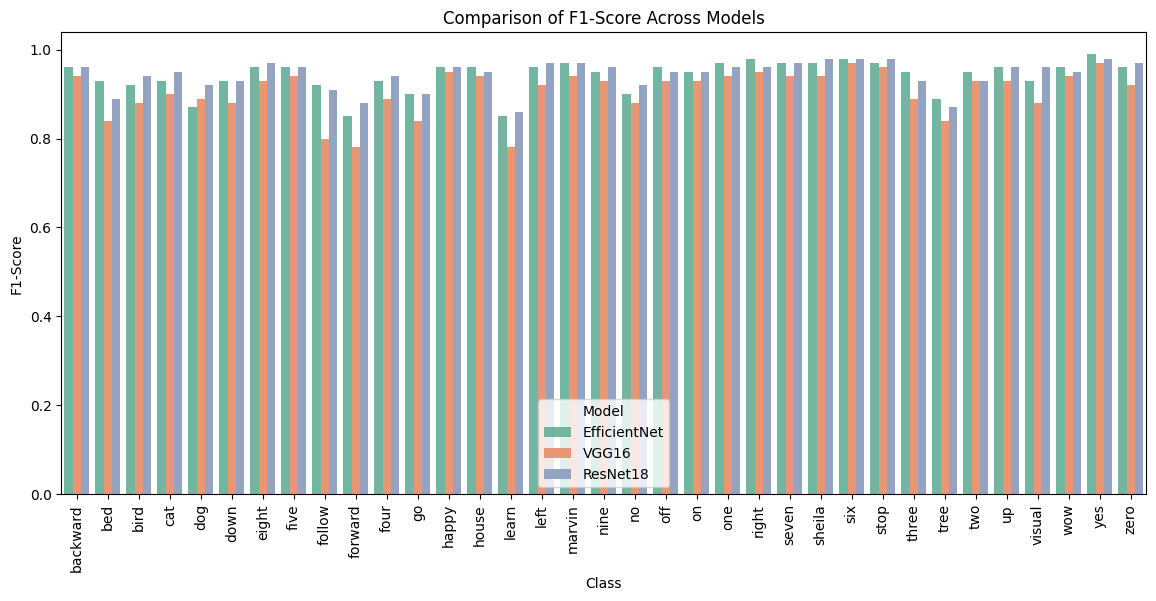

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_86660/3221637113.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Precision"], ci=None)


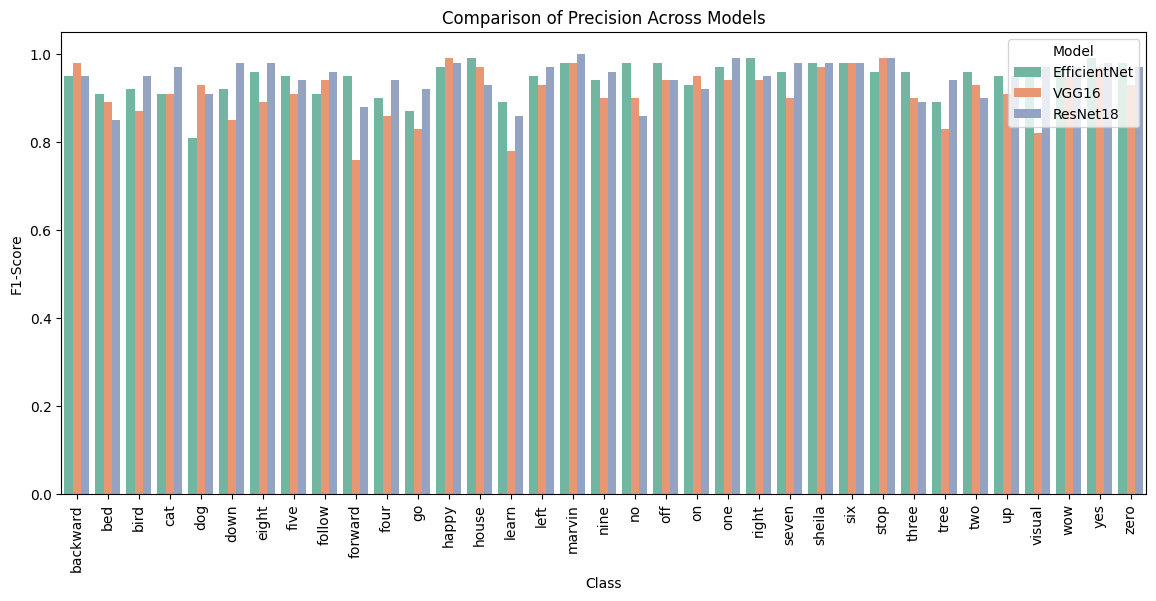

/var/folders/41/9hr5zr590rn9b8czlc_j87f00000gn/T/ipykernel_86660/3221637113.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Recall"], ci=None)


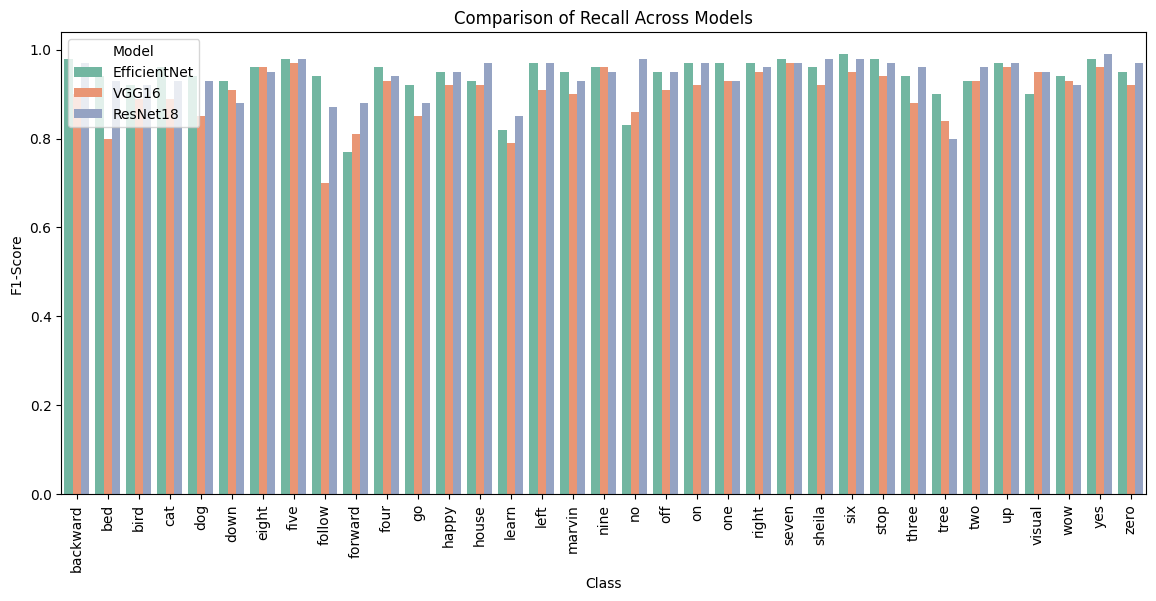

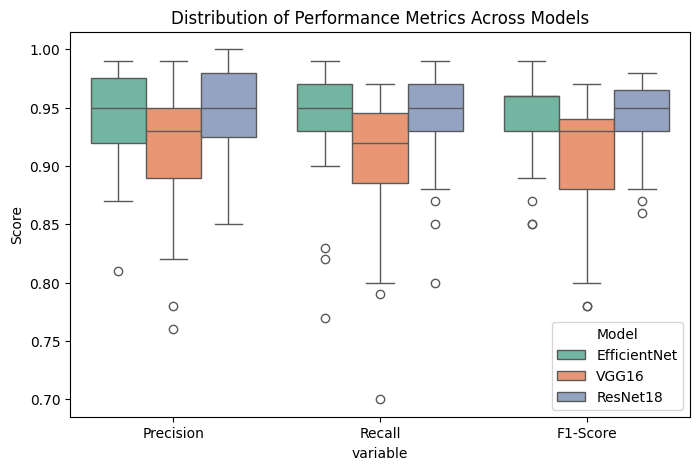

In [9]:
sns.set_palette("Set2")

# Bar plot comparing performance metrics per class across models
plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "F1-Score"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of F1-Score Across Models")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Precision"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of Precision Across Models")
plt.legend(title="Model")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(x="Class", y="value", hue="Model", data=df_melted[df_melted["variable"] == "Recall"], ci=None)
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.title("Comparison of Recall Across Models")
plt.legend(title="Model")
plt.show()


# Box plot to compare the overall distribution of Precision, Recall, and F1-score across models
plt.figure(figsize=(8, 5))
sns.boxplot(x="variable", y="value", hue="Model", data=df_melted)
plt.ylabel("Score")
plt.title("Distribution of Performance Metrics Across Models")
plt.show()

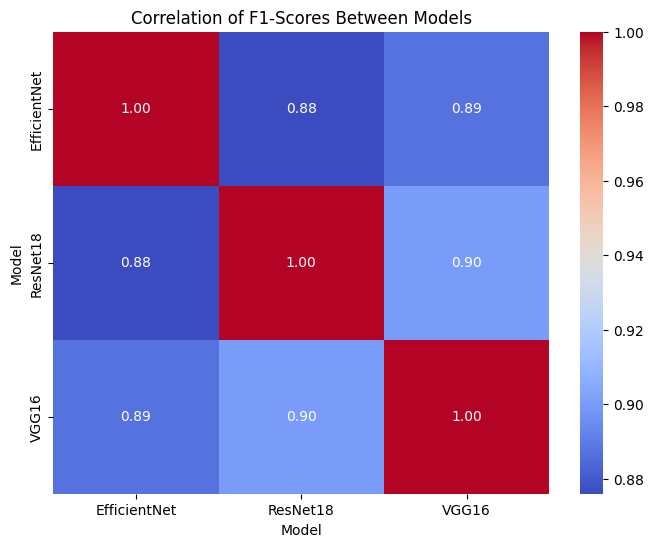

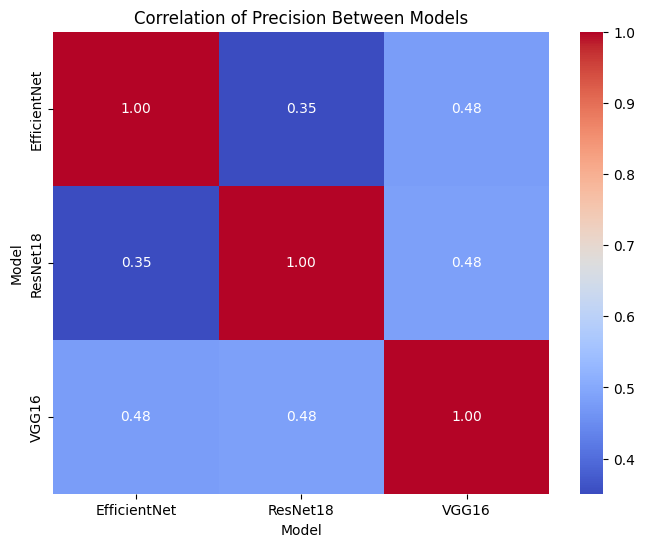

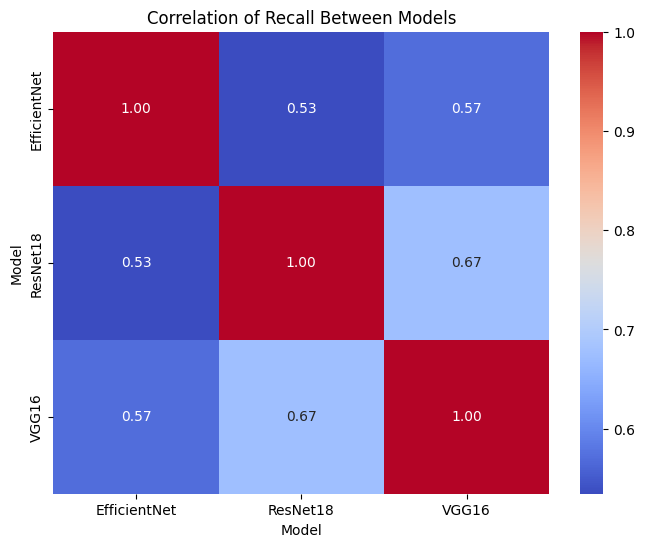

In [10]:
# Heatmap to show correlation between models
df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="F1-Score")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of F1-Scores Between Models")
plt.show()

df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="Precision")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Precision Between Models")
plt.show()

df_pivot = df_all_models.pivot_table(index="Class", columns="Model", values="Recall")
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Recall Between Models")
plt.show()



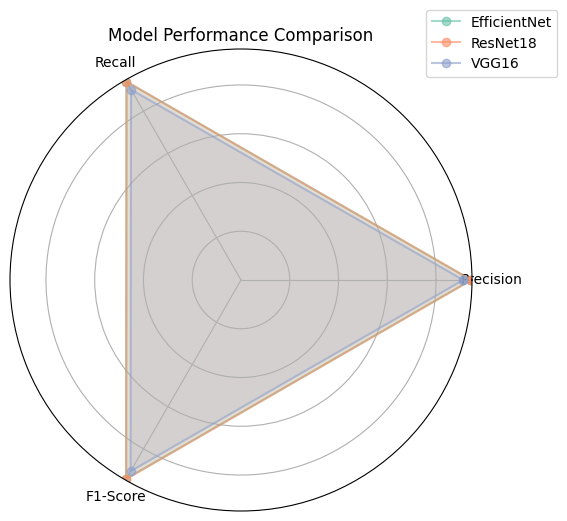

In [11]:
# Radar chart (Spider plot) for overall performance comparison

# Compute average scores per model
df_avg = df_all_models.groupby("Model")[["Precision", "Recall", "F1-Score"]].mean()

labels = df_avg.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
for model, row in df_avg.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model, marker="o", alpha=0.6)
    ax.fill(angles, values, alpha=0.2)

# Format radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.set_title("Model Performance Comparison")
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
plt.show()

### Confusion Matrix 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load confusion matrix from CSV
def load_confusion_matrix(file_path):
    df = pd.read_csv(file_path, index_col=0)  # First column is class labels
    class_labels = df.index.tolist()  # Extract class labels
    conf_matrix = df.to_numpy()  # Convert to NumPy array
    return conf_matrix, class_labels

# Load confusion matrices from three models
conf_matrix_EF, class_labels_EF = load_confusion_matrix(EF_CONF_MATRIX_PATH)
conf_matrix_VGG, class_labels_VGG = load_confusion_matrix(VGG_CONF_MATRIX_PATH)
conf_matrix_RN, class_labels_RN = load_confusion_matrix(RN_CONF_MATRIX_PATH)

#### Most Commonly Confused Words per Model

In [13]:
# Find the most commonly confused words
def get_most_confused_words(conf_matrix, class_labels, top_n=3):
    confused_words = {}
    for i, label in enumerate(class_labels):
        row = conf_matrix[i, :].copy()
        row[i] = 0  
        most_confused = np.argsort(row)[::-1][:top_n]  
        confused_words[label] = [(class_labels[idx], row[idx]) for idx in most_confused if row[idx] > 0]
    return confused_words

# Convert to DataFrame 
def convert_to_dataframe(most_confused, model_name):
    return pd.DataFrame([(word, confused[0], confused[1], model_name) 
                         for word, confused_list in most_confused.items() 
                         for confused in confused_list],
                         columns=["True Label", "Predicted Label", "Confusion Count", "Model"])


# Get the most confused words for each model
most_confused_EF = get_most_confused_words(conf_matrix_EF, class_labels_EF)
most_confused_VGG = get_most_confused_words(conf_matrix_VGG, class_labels_VGG)
most_confused_RN = get_most_confused_words(conf_matrix_RN, class_labels_RN)

df_confused_EF = convert_to_dataframe(most_confused_EF, "EfficientNet")
df_confused_VGG = convert_to_dataframe(most_confused_VGG, "VGG16")
df_confused_RN = convert_to_dataframe(most_confused_RN, "ResNet18")

df_confused_all = pd.concat([df_confused_EF, df_confused_VGG, df_confused_RN], ignore_index=True)


In [14]:
print(df_confused_all)

    True Label Predicted Label  Confusion Count         Model
0     backward            nine                1  EfficientNet
1     backward             bed                1  EfficientNet
2     backward            four                1  EfficientNet
3          bed        backward                3  EfficientNet
4          bed             cat                1  EfficientNet
..         ...             ...              ...           ...
307        yes             cat                1      ResNet18
308        yes           eight                1      ResNet18
309       zero          sheila                4      ResNet18
310       zero             two                4      ResNet18
311       zero          visual                2      ResNet18

[312 rows x 4 columns]


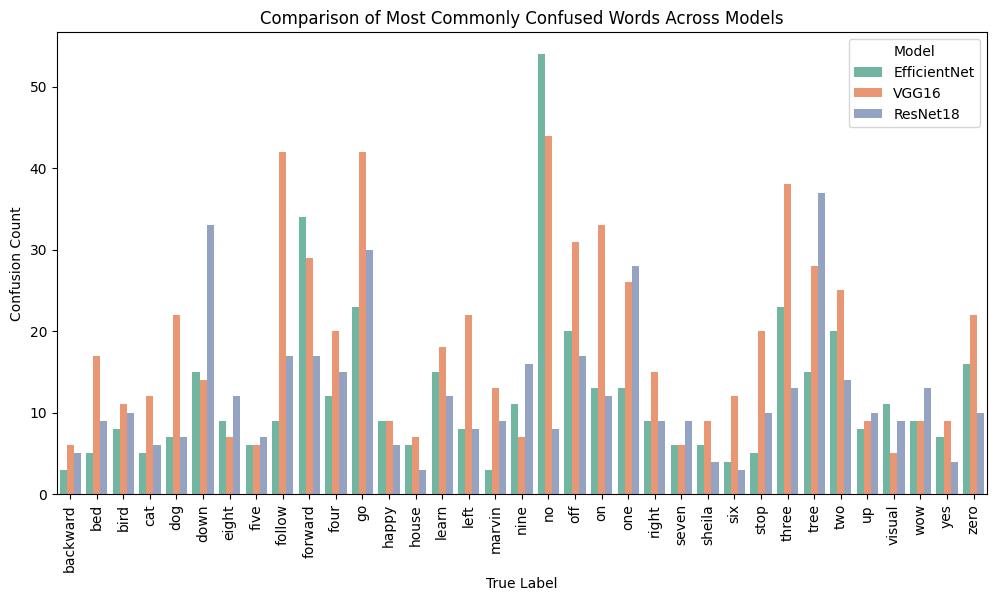

In [15]:
# Visualization - Comparing Misclassifications
sns.set_palette("Set2")
plt.figure(figsize=(12, 6))
#sns.barplot(x="True Label", y="Confusion Count", hue="Model", data=df_confused_all)
sns.barplot(x="True Label", y="Confusion Count", hue="Model", data=df_confused_all, dodge=True, estimator=sum, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Confusion Count")
plt.title("Comparison of Most Commonly Confused Words Across Models")
plt.legend(title="Model")
plt.show()

Normalized Confusion Matrix

In [16]:
# Normalize confusion matrix
def normalize_conf_matrix(conf_matrix):
    return conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Normalize confusion matrices
conf_matrix_EF_norm = normalize_conf_matrix(conf_matrix_EF)
conf_matrix_VGG_norm = normalize_conf_matrix(conf_matrix_VGG)
conf_matrix_RN_norm = normalize_conf_matrix(conf_matrix_RN)

# Get the most confused words for each model
most_confused_EF = get_most_confused_words(conf_matrix_EF_norm, class_labels_EF)
most_confused_VGG = get_most_confused_words(conf_matrix_VGG_norm, class_labels_VGG)
most_confused_RN = get_most_confused_words(conf_matrix_RN_norm, class_labels_RN)

#Conver to dataframe
df_confused_EF = convert_to_dataframe(most_confused_EF, "EfficientNet")
df_confused_VGG = convert_to_dataframe(most_confused_VGG, "VGG16")
df_confused_RN = convert_to_dataframe(most_confused_RN, "ResNet18")

df_confused_all = pd.concat([df_confused_EF, df_confused_VGG, df_confused_RN], ignore_index=True)

In [17]:
df_confused_all

,True Label,Predicted Label,Confusion Count,Model
0,backward,nine,0.006061,EfficientNet
1,backward,bed,0.006061,EfficientNet
2,backward,four,0.006061,EfficientNet
3,bed,backward,0.014493,EfficientNet
4,bed,cat,0.004831,EfficientNet
...,...,...,...,...
307,yes,cat,0.002387,ResNet18
308,yes,eight,0.002387,ResNet18
309,zero,sheila,0.009569,ResNet18
310,zero,two,0.009569,ResNet18


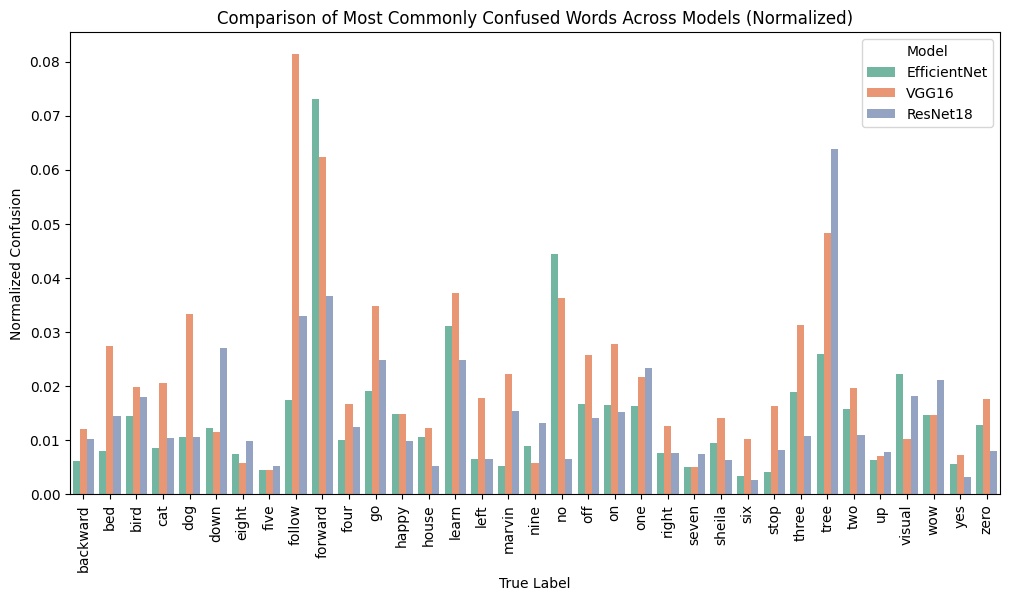

In [18]:
# Visualization - Comparing Misclassifications
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Confusion Count", hue="Model", data=df_confused_all, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Comparison of Most Commonly Confused Words Across Models (Normalized)")
plt.legend(title="Model")
plt.show()

#### Commonly Confused Pairs

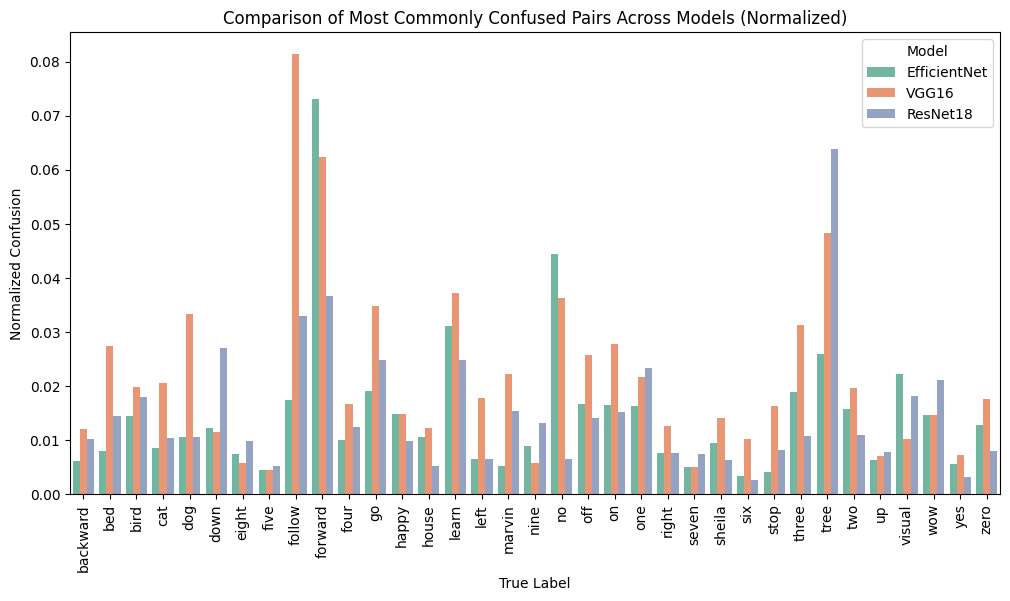

In [19]:
# most commonly confused pairs
def get_most_confused_pairs(conf_matrix, class_labels, top_n=3):
    confused_pairs = []
    for i, label in enumerate(class_labels):
        row = conf_matrix[i, :].copy()
        row[i] = 0  # Ignore correct classifications
        most_confused = np.argsort(row)[::-1][:top_n]  # Get top misclassified indices
        for idx in most_confused:
            if row[idx] > 0:
                confused_pairs.append((label, class_labels[idx], row[idx]))
    return confused_pairs

# Get the most confused pairs
most_confused_pairs_EF = get_most_confused_pairs(conf_matrix_EF_norm, class_labels_EF)
most_confused_pairs_VGG = get_most_confused_pairs(conf_matrix_VGG_norm, class_labels_VGG)
most_confused_pairs_RN = get_most_confused_pairs(conf_matrix_RN_norm, class_labels_RN)

# Convert to DataFrame 
df_confused_pairs_EF = pd.DataFrame(most_confused_pairs_EF, columns=["True Label", "Predicted Label", "Normalized Confusion"])
df_confused_pairs_EF["Model"] = "EfficientNet"

df_confused_pairs_VGG = pd.DataFrame(most_confused_pairs_VGG, columns=["True Label", "Predicted Label", "Normalized Confusion"])
df_confused_pairs_VGG["Model"] = "VGG16"

df_confused_pairs_RN = pd.DataFrame(most_confused_pairs_RN, columns=["True Label", "Predicted Label", "Normalized Confusion"])
df_confused_pairs_RN["Model"] = "ResNet18"

df_confused_pairs_all = pd.concat([df_confused_pairs_EF, df_confused_pairs_VGG, df_confused_pairs_RN], ignore_index=True)

df_confused_pairs_all

# Visualization - Comparing Misclassifications
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Normalized Confusion", hue="Model", data=df_confused_pairs_all, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Comparison of Most Commonly Confused Pairs Across Models (Normalized)")
plt.legend(title="Model")
plt.show()

In [20]:
df_confused_pairs_all

,True Label,Predicted Label,Normalized Confusion,Model
0,backward,nine,0.006061,EfficientNet
1,backward,bed,0.006061,EfficientNet
2,backward,four,0.006061,EfficientNet
3,bed,backward,0.014493,EfficientNet
4,bed,cat,0.004831,EfficientNet
...,...,...,...,...
307,yes,cat,0.002387,ResNet18
308,yes,eight,0.002387,ResNet18
309,zero,sheila,0.009569,ResNet18
310,zero,two,0.009569,ResNet18


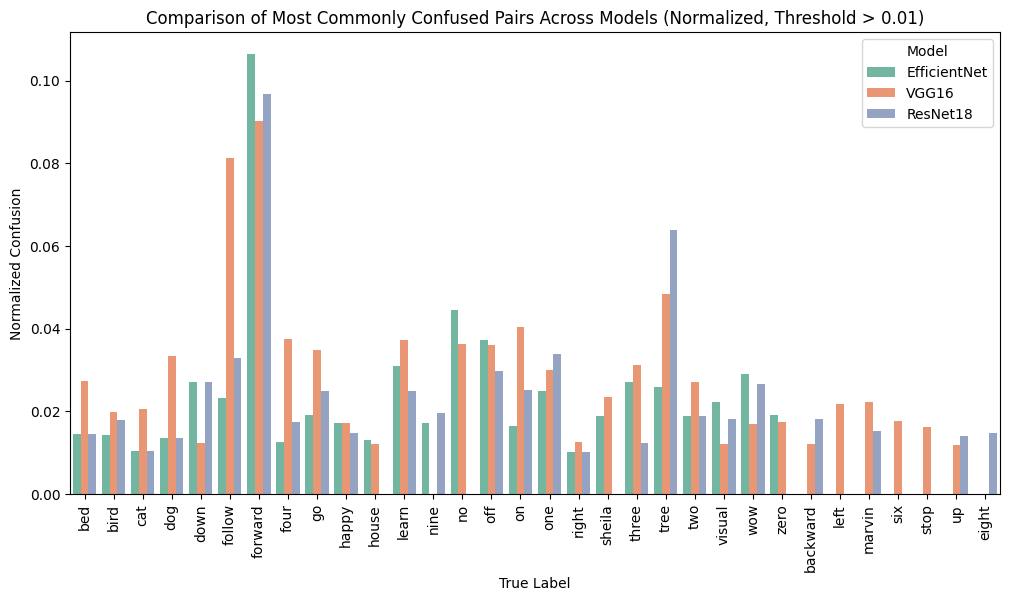

In [21]:

# Filter for confusion values greater than 0.01
filtered_df_confused_pairs = df_confused_pairs_all[df_confused_pairs_all["Normalized Confusion"] > 0.01]

# Visualization - Comparing Misclassifications
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Normalized Confusion", hue="Model", data=filtered_df_confused_pairs, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Comparison of Most Commonly Confused Pairs Across Models (Normalized, Threshold > 0.01)")
plt.legend(title="Model")
plt.show()

In [22]:
filtered_df_confused_pairs

,True Label,Predicted Label,Normalized Confusion,Model
3,bed,backward,0.014493,EfficientNet
6,bird,bed,0.016216,EfficientNet
7,bird,five,0.016216,EfficientNet
8,bird,backward,0.010811,EfficientNet
9,cat,up,0.010309,EfficientNet
...,...,...,...,...
300,visual,zero,0.030303,ResNet18
301,visual,bed,0.012121,ResNet18
302,visual,eight,0.012121,ResNet18
303,wow,no,0.038835,ResNet18


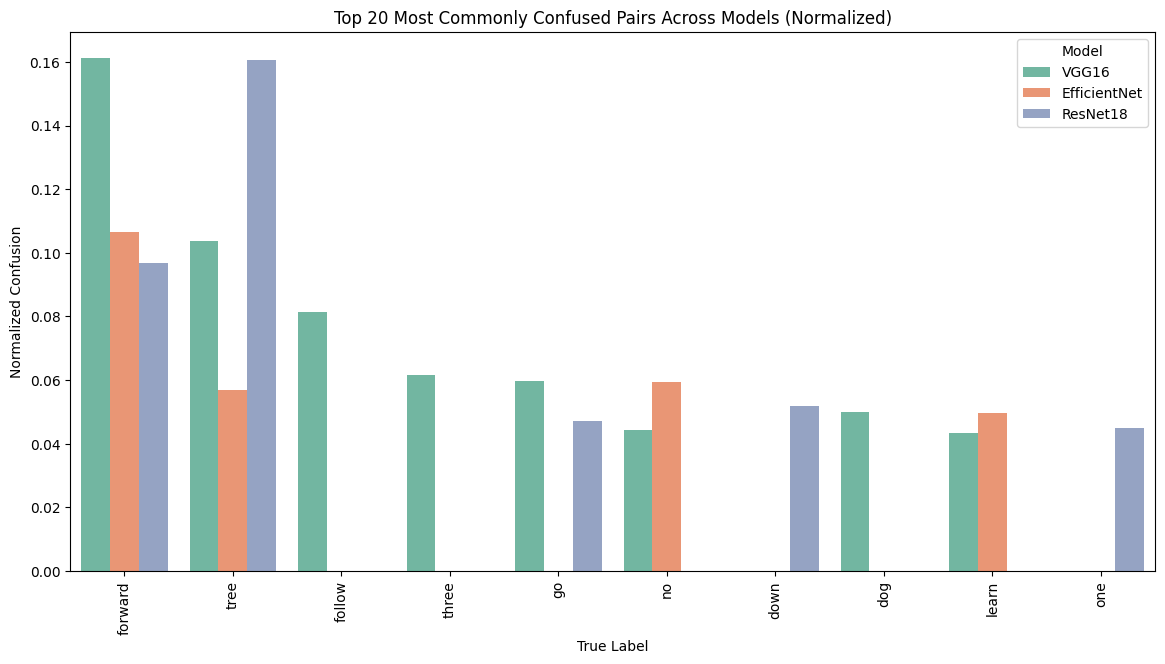

In [23]:
# Get the top 20 most confused pairs
top_20_confused_pairs = df_confused_pairs_all.sort_values("Normalized Confusion", ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.set_palette("Set2")
sns.barplot(x="True Label", y="Normalized Confusion", hue="Model", data=top_20_confused_pairs, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Top 20 Most Commonly Confused Pairs Across Models (Normalized)")
plt.legend(title="Model")
plt.show()

### Top 20 Most Commonly Confused Pairs

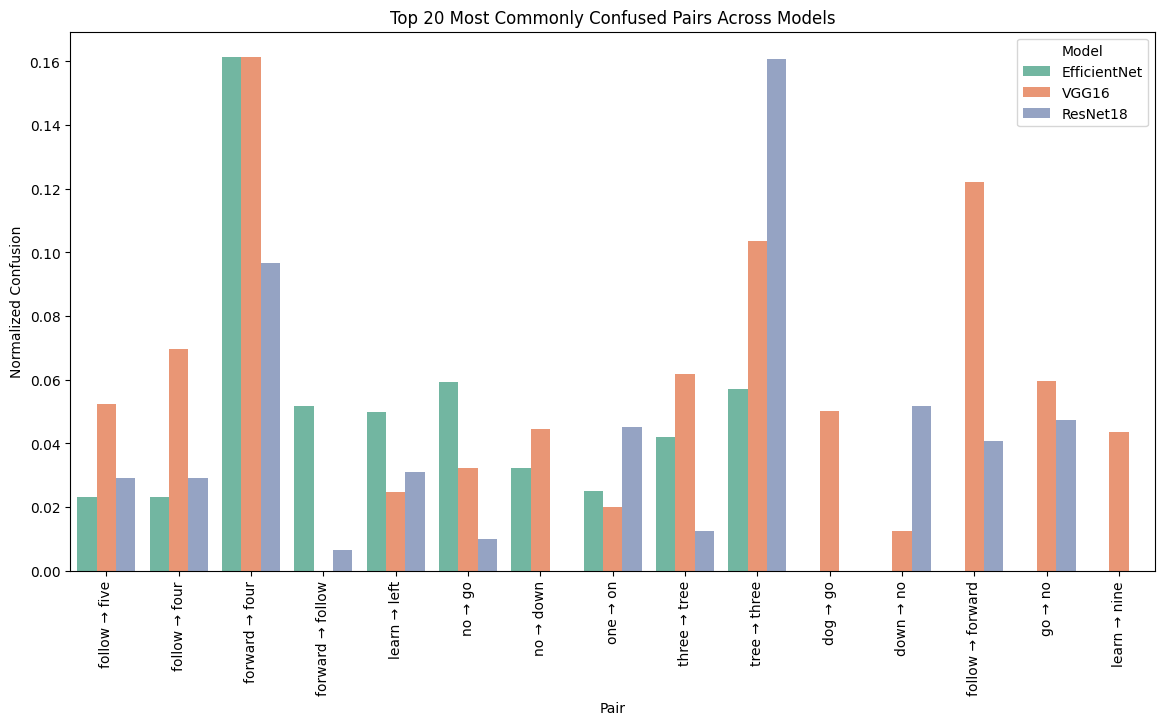

In [24]:
# most commonly confused pairs
def get_most_confused_pairs(conf_matrix, class_labels, top_n=3):
    confused_pairs = []
    for i, label in enumerate(class_labels):
        row = conf_matrix[i, :].copy()
        row[i] = 0 
        most_confused = np.argsort(row)[::-1][:top_n] 
        for idx in most_confused:
            if row[idx] > 0:
                confused_pairs.append((label, class_labels[idx], row[idx]))
    return confused_pairs

# most confused pairs 
most_confused_pairs_EF = get_most_confused_pairs(conf_matrix_EF_norm, class_labels_EF)
most_confused_pairs_VGG = get_most_confused_pairs(conf_matrix_VGG_norm, class_labels_VGG)
most_confused_pairs_RN = get_most_confused_pairs(conf_matrix_RN_norm, class_labels_RN)

# Convert to DataFrame 
def convert_to_dataframe(most_confused_pairs, model_name):
    df = pd.DataFrame(most_confused_pairs, columns=["True Label", "Predicted Label", "Normalized Confusion"])
    df["Model"] = model_name
    df["Pair"] = df["True Label"] + " → " + df["Predicted Label"]
    return df

df_confused_pairs_EF = convert_to_dataframe(most_confused_pairs_EF, "EfficientNet")
df_confused_pairs_VGG = convert_to_dataframe(most_confused_pairs_VGG, "VGG16")
df_confused_pairs_RN = convert_to_dataframe(most_confused_pairs_RN, "ResNet18")

df_confused_pairs_all = pd.concat([df_confused_pairs_EF, df_confused_pairs_VGG, df_confused_pairs_RN], ignore_index=True)

# Get the top 20 
top_20_confused_pairs = df_confused_pairs_all.sort_values("Normalized Confusion", ascending=False).head(20)

# get the confusion values for these pairs from all models
df_filtered = df_confused_pairs_all[df_confused_pairs_all["Pair"].isin(top_20_confused_pairs["Pair"])]

# Visualization 
plt.figure(figsize=(14, 7))
sns.set_palette("Set2")
sns.barplot(x="Pair", y="Normalized Confusion", hue="Model", data=df_filtered, errorbar=None)
plt.xticks(rotation=90)
plt.ylabel("Normalized Confusion")
plt.title("Top 20 Most Commonly Confused Pairs Across Models")
plt.legend(title="Model")
plt.show()


## Accuracy Comparison

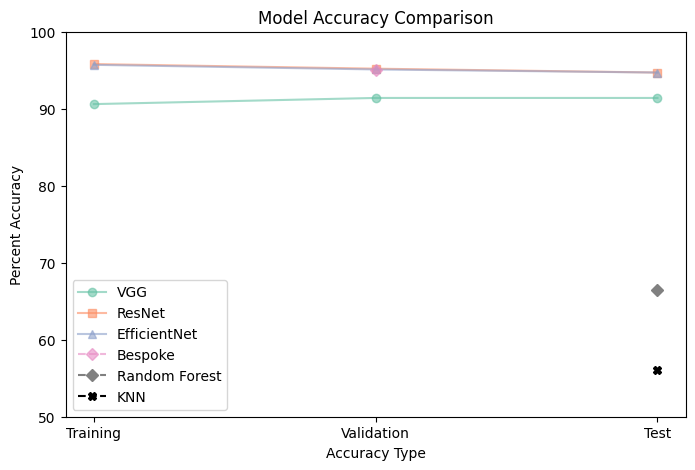

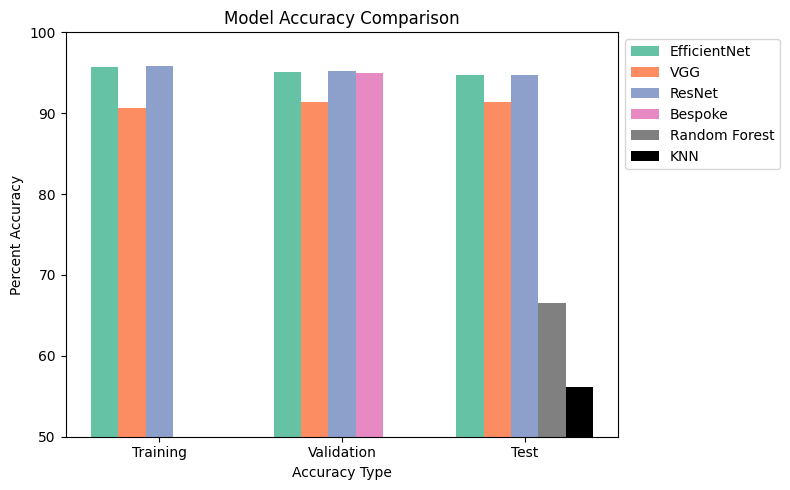

In [25]:
import matplotlib.pyplot as plt

#manually input data
categories = ["Training", "Validation", "Test"]
vgg_acc = [90.6, 91.4, 91.4]
resnet_acc = [95.8, 95.2, 94.7]
efficientnet_acc = [95.7, 95.1, 94.7]
bespoke_acc = [None, 95, None] # Only Test Accuracy 
random_forest_acc = [None, None, 66.5] # Only test accuracy available
knn_acc = [None, None, 56.1]  # Only test accuracy available

# Replace None values with NaN for plotting (so they don't appear)
import numpy as np
bespoke_acc = [np.nan if v is None else v for v in bespoke_acc]
random_forest_acc = [np.nan if v is None else v for v in random_forest_acc]
knn_acc = [np.nan if v is None else v for v in knn_acc]

# Line Plot
#plt.style.use("seaborn-v0_8-colorblind")
plt.figure(figsize=(8, 5))
sns.set_palette("Set2")
plt.plot(categories, vgg_acc, marker="o", linestyle="-", label="VGG", alpha = 0.6)
plt.plot(categories, resnet_acc, marker="s", linestyle="-", label="ResNet", alpha = 0.6)
plt.plot(categories, efficientnet_acc, marker="^", linestyle="-", label="EfficientNet", alpha = 0.6)
plt.plot(categories, bespoke_acc, marker="D", linestyle="dashed", label="Bespoke", alpha = 0.6)
plt.plot(categories, random_forest_acc, marker="D", linestyle="dashed", label="Random Forest", color="gray")
plt.plot(categories, knn_acc, marker="X", linestyle="dashed", label="KNN", color="black")
plt.xlabel("Accuracy Type")
plt.ylabel("Percent Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.ylim(50, 100)
plt.show()

#Bar Plot
width = 0.15

plt.figure(figsize=(8, 5))
x = np.arange(len(categories))
plt.bar(x - 2 * width, efficientnet_acc, width, label="EfficientNet", alpha=1)
plt.bar(x - width, vgg_acc, width, label="VGG", alpha=1)
plt.bar(x, resnet_acc, width, label="ResNet", alpha=1)
plt.bar(x + width, bespoke_acc, width, label="Bespoke", alpha=1)
plt.bar(x + width, random_forest_acc, width, label="Random Forest", color="gray")
plt.bar(x + 2 * width, knn_acc, width, label="KNN", color="black")
plt.xlabel("Accuracy Type")
plt.ylabel("Percent Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(ticks=x, labels=categories)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.ylim(50, 100)
plt.show()


# Hyperparameter Tuning Results

## Efficient Net

Random Search Hyperparameter Exploration 

Hyperparameters
- Learning Rate: 0.001, 0.0005, 0.0001
- Optimizer: Adam vs Stochastic Gradient Descent 
- Weight Decay: 0, 0.0001, 0.00001
- Freeze Layers: true, False

Selected Results 
OG: Learning Rate: 0.001, Optimizer: Adam, Weight Decay: 0, Freeze Layers: False 

In [26]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, cohen_kappa_score
import os
import sys
from PIL import Image
import pickle
import math
# Add dataset directory to sys.path to load Dataset 
dataset_dir = os.path.abspath("../models/CNN_EfficientNet")
sys.path.append(dataset_dir)
from dataset import SpeechCommandsDataset



# Define device (MPS for Mac, CUDA for Nvidia, CPU as fallback)
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


#### Functions

In [27]:
# Load Test Filenames
def load_filenames(file_path):
    with open(file_path, "r") as f:
        return set(line.strip().replace(".wav", ".png") for line in f.readlines())

# Define transformation 
transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

#Efficient Net Model 
def create_model(num_classes):
    # Load EfficientNet-B0 with pretrained ImageNet weights
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

    # Modify the classifier to match our dataset
    num_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Linear(num_features, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, num_classes),
        nn.LogSoftmax(dim=1)  # Output probabilities
    )

    return model


# Load Model

def load_model(model_path, test_data, map=device):
    model = create_model(num_classes=len(test_data.classes))

    # Ensure the checkpoint file exists before loading
    if os.path.exists(model_path):
        checkpoint = torch.load(model_path, map_location=map, pickle_module=pickle)  # Load full checkpoint

        if "model_state_dict" in checkpoint:
            model.load_state_dict(checkpoint["model_state_dict"])  # Load only model weights
            print(f"Model loaded from {model_path}")
        else:
            print(f"Error: Checkpoint does not contain model_state_dict. Verify saving/loading process.")
            exit()

        model.to(map)
        model.eval()
    else:
        print(f"Error: Model not found at {model_path}")
        exit()

    return model


#### Inputs: Word Lists

In [28]:
data_dir = "../data/images/Speech Commands (trimmed)"
val_list_path = "../docs/testing_list.txt"

# EfficientNet Hyperparam Models 
EN_CHECKPOINT_DIR = "../models/CNN_EfficientNet/checkpoints"
model_files = [f for f in os.listdir(EN_CHECKPOINT_DIR) 
               if f.endswith(".pth") and f != "efficientnet_speech_commands.pth"] #ignore checkpoint model
print(f"Found {len(model_files)} models")


Found 5 models


In [29]:
# Define Auxillary vs Core Words
core_words = ['five', 'zero', 'yes', 'seven', 'no', 'nine', 'down', 'one', 'go', 'two',
               'stop', 'six', 'on', 'left', 'eight', 'night', 'off', 'four', 'three', 'up']
auxiliary_words = ['dog', 'wow', 'house', 'marvin', 'bird', 'happy', 'cat', 'sheila',
                   'bed', 'tree', 'backward', 'visual', 'follow', 'learn', 'forward']
print(f"Core Words: {len(core_words)}")
print(f"Auxillary Words: {len(auxiliary_words)}")

word_list = core_words + auxiliary_words
word_to_category = {word: 'Core' if word in core_words else 'Auxiliary' for word in word_list}
word_to_index = {idx: word for idx, word in enumerate(word_list)}

Core Words: 20
Auxillary Words: 15


Look for models & parse hyperparameters 

In [30]:
# Find Models
model_files = [f for f in os.listdir(EN_CHECKPOINT_DIR) 
               if f.endswith(".pth") and f != "efficientnet_speech_commands.pth"] #ignore checkpoint model
print(f"Found {len(model_files)} models")

# Dictionary to store model details
parsed_models = {
    "Model Name": [],
    "Optimizer": [],
    "Learning Rate": [],
    "Weight Decay": [],
    "Frozen": []
}

# Dictionary to store model paths 
model_paths = {}

# Default parameters for 'best_model.pth'
default_params = {
    "Optimizer": "Adam",
    "Learning Rate": "0.001",
    "Weight Decay": "0",
    "Frozen": "Unfrozen"
}

# Parse parameters from model names
n = 0
for model in model_files:
    model_path = os.path.join(EN_CHECKPOINT_DIR, model)
    if model == "best_model.pth":
        parsed_models["Model Name"].append("Original")
        parsed_models["Optimizer"].append(default_params["Optimizer"])
        parsed_models["Learning Rate"].append(default_params["Learning Rate"])
        parsed_models["Weight Decay"].append(default_params["Weight Decay"])
        parsed_models["Frozen"].append(default_params["Frozen"])
        model_paths["Original"] = model_path
    else:
        parts = model.replace(".pth", "").split("_")

        optimizer = None
        lr = None
        wd = None
        freeze = None

        for i, part in enumerate(parts):
            if part == "Adam" or part == "SGD":
                optimizer = part
            elif part.startswith("lr"):
                lr = part.replace("lr", "")
            elif part.startswith("wd"):
                wd = part.replace("wd", "")
            elif part.startswith("freeze"):
                freeze = "Frozen" if "True" in part else "Unfrozen"
        n += 1
        name = "Configuration #"
        parsed_models["Model Name"].append(name.replace("#", str(n)))
        parsed_models["Optimizer"].append(optimizer)
        parsed_models["Learning Rate"].append(lr)
        parsed_models["Weight Decay"].append(wd)
        parsed_models["Frozen"].append(freeze)
        model_paths[name.replace("#", str(n))] = model_path

# Create DataFrame
df_models = pd.DataFrame(parsed_models)
print(df_models)


Found 5 models
        Model Name Optimizer Learning Rate Weight Decay    Frozen
0  Configuration 1      Adam        0.0001       0.0001    Frozen
1         Original      Adam         0.001            0  Unfrozen
2  Configuration 2      Adam        0.0005            0  Unfrozen
3  Configuration 3       SGD        0.0005       0.0001  Unfrozen
4  Configuration 4       SGD        0.0001       0.0001  Unfrozen


#### Evaluate Models

In [31]:
# Evaluate models
results = {}
all_labels = []
all_preds = {}

# Load Test Dataset
val_filenames = load_filenames(val_list_path)
val_dataset = SpeechCommandsDataset(data_dir, file_list=val_filenames, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Load & Evaluate Models
for model_name, model_path in model_paths.items():
    model = load_model(model_path, val_dataset)
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # Store predictions for analysis
    all_preds[model_name] = y_pred
    all_labels = y_true  # Same for all models
    
    # Compute metrics
    clf_report = classification_report(y_true, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_true, y_pred)
    norm_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    accuracy = clf_report['accuracy']
    
    # Extract word-specific metrics
    word_metrics = []
    for label, metrics in clf_report.items():
        if label.isdigit():
            label = int(label)
            word = word_to_index.get(label, f'Unknown_{label}')
            category = word_to_category.get(word, 'Unknown')
            word_metrics.append({
                'Word': word,
                'Category': category,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Model': model_name
            })

    results[model_name] = {
        'Classification Report': clf_report,
        'Confusion Matrix': conf_matrix,
        'Normalized Confusion Matrix': norm_conf_matrix,
        'MCC Score': mcc,
        'Cohen Kappa Score': kappa,
        'Accuracy': accuracy,
        'Precision': np.mean([metrics['precision'] for label, metrics in clf_report.items() if label.isdigit()]),
        'Recall': np.mean([metrics['recall'] for label, metrics in clf_report.items() if label.isdigit()]),
        'F1-Score': np.mean([metrics['f1-score'] for label, metrics in clf_report.items() if label.isdigit()]),
        'Word Metrics': word_metrics
    }

# Convert word-specific metrics to DataFrame
word_metrics_df = pd.DataFrame([metric for model in results.values() for metric in model['Word Metrics']])

Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_Adam_lr0.0001_wd0.0001_freezeTrue.pth
Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model.pth
Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_Adam_lr0.0005_wd0_freezeFalse.pth
Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_SGD_lr0.0005_wd0.0001_freezeFalse.pth
Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_SGD_lr0.0001_wd0.0001_freezeFalse.pth


In [32]:
# Save results to a CSV file
metrics_df = pd.DataFrame({
    model_name: {
        'MCC Score': metrics['MCC Score'],
        "Cohen's Kappa": metrics['Cohen Kappa Score'],
        "Accuracy": metrics['Accuracy'],
        "Precision": metrics['Precision'],
        "Recall": metrics['Recall'], 
        "F1-Score": metrics['F1-Score']
    }
    for model_name, metrics in results.items()
}).T
output_dir = '../models/CNN_EfficientNet/results'
os.makedirs(output_dir, exist_ok=True)
metrics_df.to_csv(os.path.join(output_dir,'EfficientNet_hyperparam_evaluation_results.csv'))
print("Results saved to model_evaluation_results.csv")

Results saved to model_evaluation_results.csv


### Explore EfficientNet Hyperparams

#### Overall Scores

In [33]:
# Table with summary scores & hyperparameters
metrics_df

,MCC Score,Cohen's Kappa,Accuracy,Precision,Recall,F1-Score
Configuration 1,0.275526,0.275047,0.300045,0.296187,0.264280,0.264917
Original,0.946683,0.946666,0.948387,0.949127,0.940711,0.944450
Configuration 2,0.943052,0.943011,0.944843,0.942252,0.938424,0.939520
Configuration 3,0.927359,0.927331,0.929668,0.925467,0.921164,0.922681
Configuration 4,0.791896,0.791658,0.798546,0.788959,0.757486,0.766017


<Figure size 1000x600 with 0 Axes>

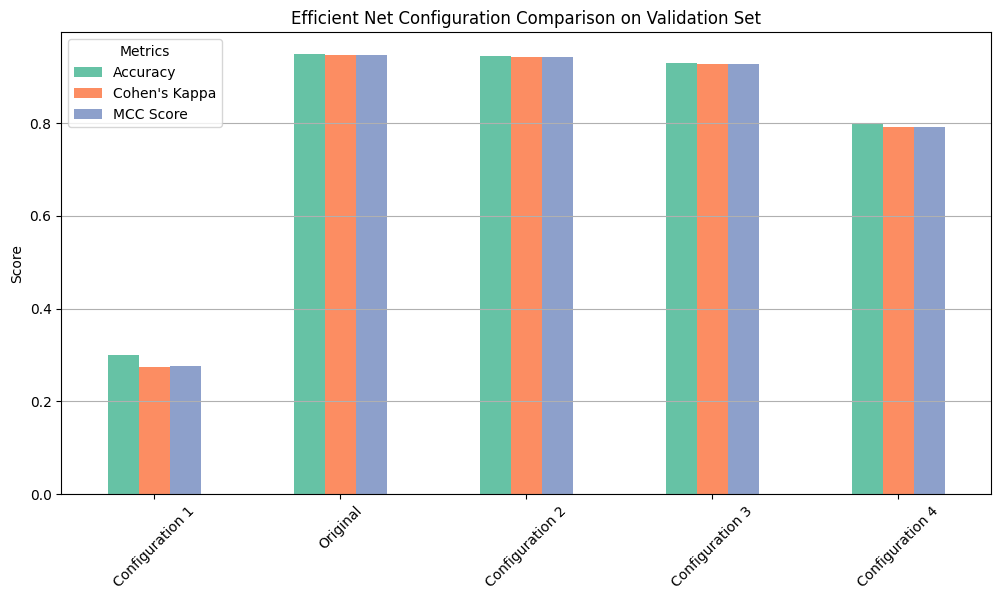

In [34]:
# Plot comparison of Accuracy, Cohen's Kappa, and MCC score
sns.set_palette("Set2")
plt.figure(figsize=(10,6))
results_df = metrics_df[['Accuracy', "Cohen's Kappa", 'MCC Score']]
results_df.plot(kind='bar', figsize=(12,6))
plt.title('Efficient Net Configuration Comparison on Validation Set')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()

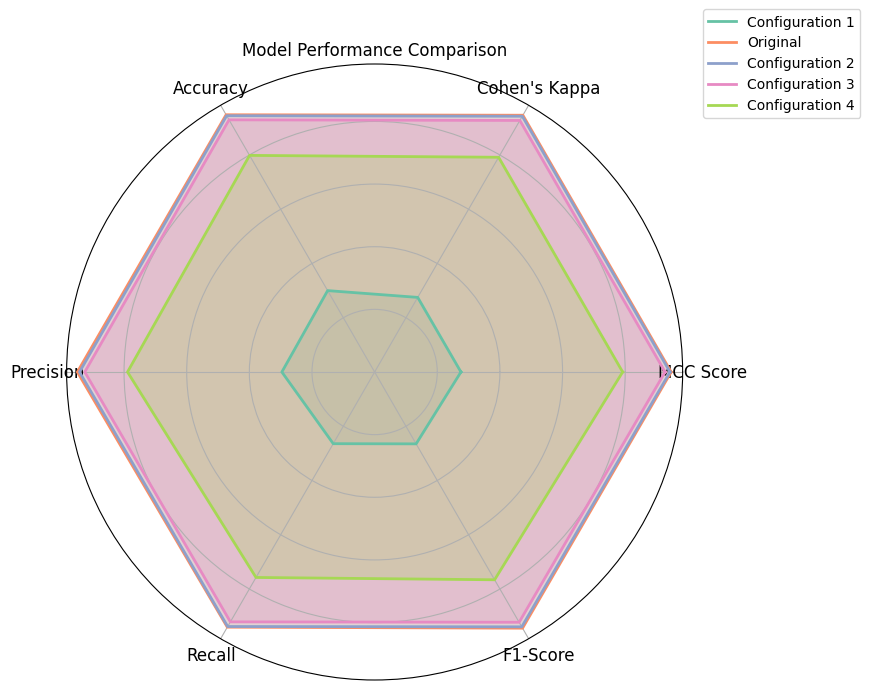

In [35]:
# Radar plot function
def plot_radar_chart(metrics_df):
    labels = metrics_df.columns.tolist()
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * math.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    for model_name, row in metrics_df.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=model_name, linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    plt.title('Model Performance Comparison')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Generate radar plot
plot_radar_chart(metrics_df)

#### Individual Word Scores

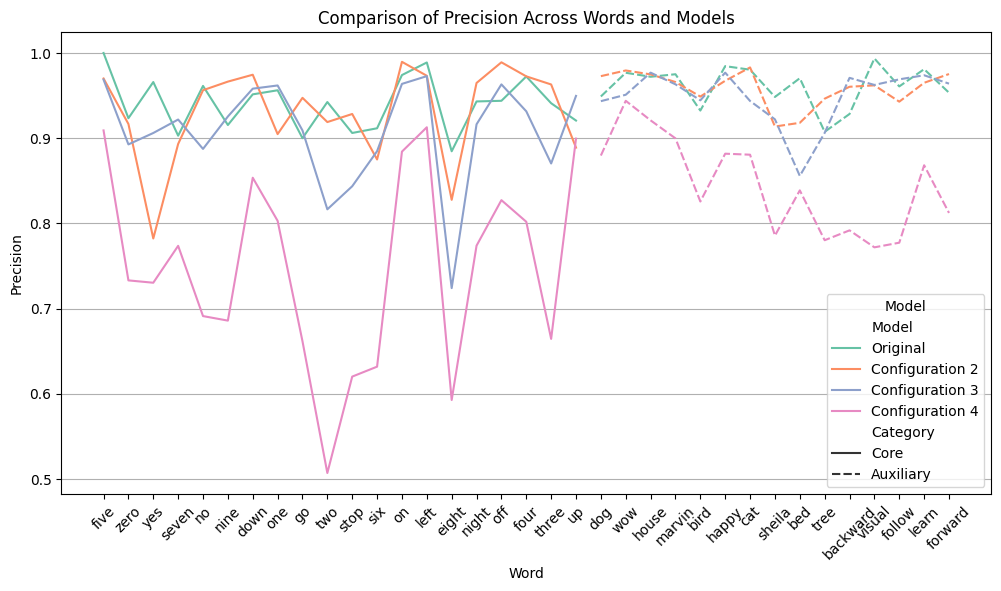

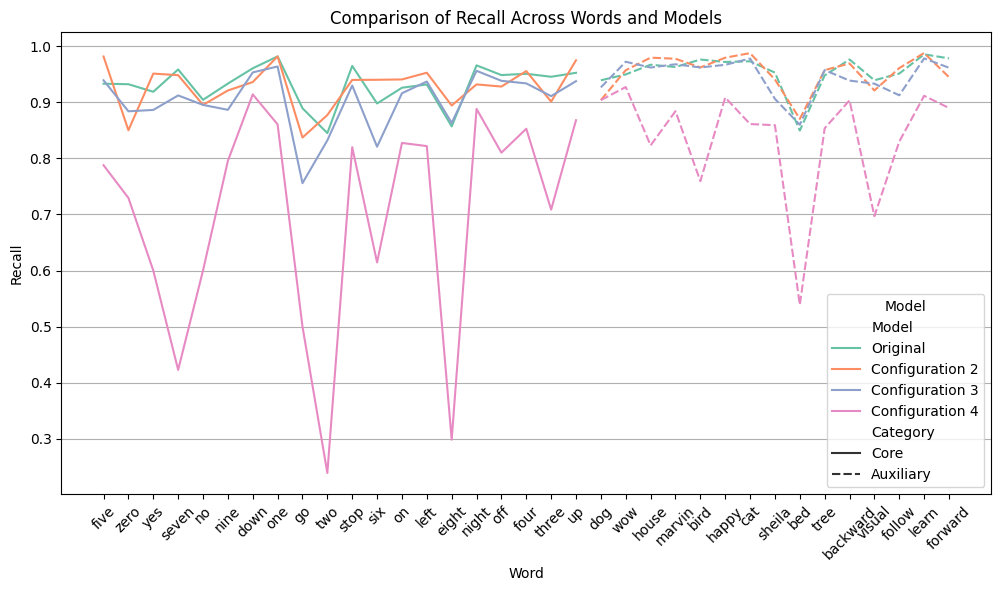

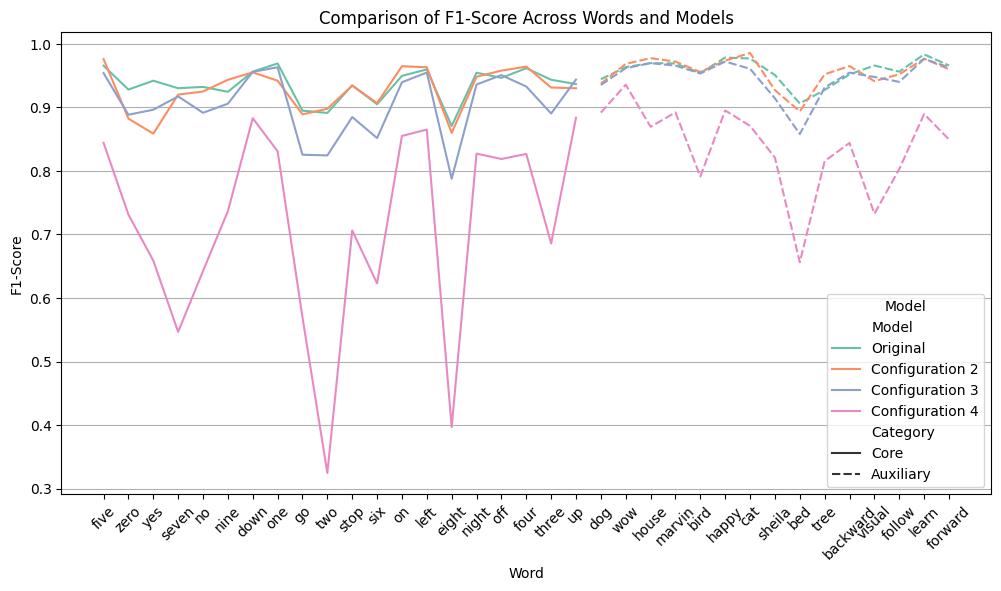

In [39]:
# Plot bar charts for each metric
filtered_df = word_metrics_df[word_metrics_df['Model'] != 'Configuration 1']
metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
for metric in metrics_to_plot:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=filtered_df, x='Word', y=metric, hue='Model', style='Category', dashes=True)
    plt.title(f'Comparison of {metric} Across Words and Models')
    plt.ylabel(metric)
    plt.xlabel('Word')
    plt.xticks(rotation=45)
    plt.legend(title='Model')
    plt.grid(axis='y')
    plt.show()



# Test Noisy Data: Models Trained on Clean Data

#### Import 

In [40]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, cohen_kappa_score
import os
import sys
from PIL import Image
import pickle
import math
# Add dataset directory to sys.path to load Dataset 
dataset_dir = os.path.abspath("../models/CNN_EfficientNet")
sys.path.append(dataset_dir)
from dataset import SpeechCommandsDataset



# Define device (MPS for Mac, CUDA for Nvidia, CPU as fallback)
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [41]:
# Load Test Filenames
def load_filenames(file_path):
    with open(file_path, "r") as f:
        return set(line.strip().replace(".wav", ".png") for line in f.readlines())

# Define transformation 
transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

#Efficient Net Model 
def create_model(num_classes):
    # Load EfficientNet-B0 with pretrained ImageNet weights
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

    # Modify the classifier to match our dataset
    num_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Linear(num_features, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, num_classes),
        nn.LogSoftmax(dim=1)  # Output probabilities
    )

    return model


# Load Model

def load_model(model_path, test_data, map=device):
    model = create_model(num_classes=len(test_data.classes))

    # Ensure the checkpoint file exists before loading
    if os.path.exists(model_path):
        checkpoint = torch.load(model_path, map_location=map, pickle_module=pickle)  # Load full checkpoint

        if "model_state_dict" in checkpoint:
            model.load_state_dict(checkpoint["model_state_dict"])  # Load only model weights
            print(f"Model loaded from {model_path}")
        else:
            print(f"Error: Checkpoint does not contain model_state_dict. Verify saving/loading process.")
            exit()

        model.to(map)
        model.eval()
    else:
        print(f"Error: Model not found at {model_path}")
        exit()

    return model


#### Import Words 

In [42]:
data_dir = "../data/images/Speech Commands_noise"
val_list_path = "../docs/testing_list.txt"

# EfficientNet Hyperparam Models 
EN_CHECKPOINT_DIR = "../models/CNN_EfficientNet/checkpoints"
model_files = [f for f in os.listdir(EN_CHECKPOINT_DIR) 
               if f.endswith(".pth") and f != "efficientnet_speech_commands.pth"] #ignore checkpoint model
print(f"Found {len(model_files)} models")


Found 5 models


In [43]:
# Define Auxillary vs Core Words
core_words = ['five', 'zero', 'yes', 'seven', 'no', 'nine', 'down', 'one', 'go', 'two',
               'stop', 'six', 'on', 'left', 'eight', 'night', 'off', 'four', 'three', 'up']
auxiliary_words = ['dog', 'wow', 'house', 'marvin', 'bird', 'happy', 'cat', 'sheila',
                   'bed', 'tree', 'backward', 'visual', 'follow', 'learn', 'forward']
print(f"Core Words: {len(core_words)}")
print(f"Auxillary Words: {len(auxiliary_words)}")

word_list = core_words + auxiliary_words
word_to_category = {word: 'Core' if word in core_words else 'Auxiliary' for word in word_list}
word_to_index = {idx: word for idx, word in enumerate(word_list)}

Core Words: 20
Auxillary Words: 15


#### Look for models & Evaluate Models

In [44]:
# Find Models
model_files = [f for f in os.listdir(EN_CHECKPOINT_DIR) 
               if f.endswith(".pth") and f != "efficientnet_speech_commands.pth"] #ignore checkpoint model
print(f"Found {len(model_files)} models")

# Dictionary to store model details
parsed_models = {
    "Model Name": [],
    "Optimizer": [],
    "Learning Rate": [],
    "Weight Decay": [],
    "Frozen": []
}

# Dictionary to store model paths 
model_paths = {}

# Default parameters for 'best_model.pth'
default_params = {
    "Optimizer": "Adam",
    "Learning Rate": "0.001",
    "Weight Decay": "0",
    "Frozen": "Unfrozen"
}

# Parse parameters from model names
n = 0
for model in model_files:
    model_path = os.path.join(EN_CHECKPOINT_DIR, model)
    if model == "best_model.pth":
        parsed_models["Model Name"].append("Original")
        parsed_models["Optimizer"].append(default_params["Optimizer"])
        parsed_models["Learning Rate"].append(default_params["Learning Rate"])
        parsed_models["Weight Decay"].append(default_params["Weight Decay"])
        parsed_models["Frozen"].append(default_params["Frozen"])
        model_paths["Original"] = model_path
    else:
        parts = model.replace(".pth", "").split("_")

        optimizer = None
        lr = None
        wd = None
        freeze = None

        for i, part in enumerate(parts):
            if part == "Adam" or part == "SGD":
                optimizer = part
            elif part.startswith("lr"):
                lr = part.replace("lr", "")
            elif part.startswith("wd"):
                wd = part.replace("wd", "")
            elif part.startswith("freeze"):
                freeze = "Frozen" if "True" in part else "Unfrozen"
        n += 1
        name = "Configuration #"
        parsed_models["Model Name"].append(name.replace("#", str(n)))
        parsed_models["Optimizer"].append(optimizer)
        parsed_models["Learning Rate"].append(lr)
        parsed_models["Weight Decay"].append(wd)
        parsed_models["Frozen"].append(freeze)
        model_paths[name.replace("#", str(n))] = model_path

# Create DataFrame
df_models = pd.DataFrame(parsed_models)
print(df_models)

Found 5 models
        Model Name Optimizer Learning Rate Weight Decay    Frozen
0  Configuration 1      Adam        0.0001       0.0001    Frozen
1         Original      Adam         0.001            0  Unfrozen
2  Configuration 2      Adam        0.0005            0  Unfrozen
3  Configuration 3       SGD        0.0005       0.0001  Unfrozen
4  Configuration 4       SGD        0.0001       0.0001  Unfrozen


In [45]:
# Evaluate models
results = {}
all_labels = []
all_preds = {}

# Load Test Dataset
val_filenames = load_filenames(val_list_path)
val_dataset = SpeechCommandsDataset(data_dir, file_list=val_filenames, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# Load & Evaluate Models
for model_name, model_path in model_paths.items():
    model = load_model(model_path, val_dataset)
    y_true, y_pred = [], []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # Store predictions for analysis
    all_preds[model_name] = y_pred
    all_labels = y_true  # Same for all models
    
    # Compute metrics
    clf_report = classification_report(y_true, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_true, y_pred)
    norm_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    accuracy = clf_report['accuracy']
    
    # Extract word-specific metrics
    word_metrics = []
    for label, metrics in clf_report.items():
        if label.isdigit():
            label = int(label)
            word = word_to_index.get(label, f'Unknown_{label}')
            category = word_to_category.get(word, 'Unknown')
            word_metrics.append({
                'Word': word,
                'Category': category,
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1-Score': metrics['f1-score'],
                'Model': model_name
            })

    results[model_name] = {
        'Classification Report': clf_report,
        'Confusion Matrix': conf_matrix,
        'Normalized Confusion Matrix': norm_conf_matrix,
        'MCC Score': mcc,
        'Cohen Kappa Score': kappa,
        'Accuracy': accuracy,
        'Precision': np.mean([metrics['precision'] for label, metrics in clf_report.items() if label.isdigit()]),
        'Recall': np.mean([metrics['recall'] for label, metrics in clf_report.items() if label.isdigit()]),
        'F1-Score': np.mean([metrics['f1-score'] for label, metrics in clf_report.items() if label.isdigit()]),
        'Word Metrics': word_metrics
    }

# Convert word-specific metrics to DataFrame
word_metrics_df = pd.DataFrame([metric for model in results.values() for metric in model['Word Metrics']])

Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_Adam_lr0.0001_wd0.0001_freezeTrue.pth


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model.pth


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_Adam_lr0.0005_wd0_freezeFalse.pth
Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_SGD_lr0.0005_wd0.0001_freezeFalse.pth


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Model loaded from ../models/CNN_EfficientNet/checkpoints/best_model_SGD_lr0.0001_wd0.0001_freezeFalse.pth


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [46]:
# Save results to a CSV file
metrics_df = pd.DataFrame({
    model_name: {
        'MCC Score': metrics['MCC Score'],
        "Cohen's Kappa": metrics['Cohen Kappa Score'],
        "Accuracy": metrics['Accuracy'],
        "Precision": metrics['Precision'],
        "Recall": metrics['Recall'], 
        "F1-Score": metrics['F1-Score']
    }
    for model_name, metrics in results.items()
}).T
output_dir = '../models/CNN_EfficientNet/results'
os.makedirs(output_dir, exist_ok=True)
metrics_df.to_csv(os.path.join(output_dir,'EfficientNet_Noise_TrainedwithoutNoise.csv'))
print("Results saved to model_evaluation_results.csv")

Results saved to model_evaluation_results.csv


### Explore Results

#### Overall Score

In [47]:
# Table with summary scores & hyperparameters
metrics_df

,MCC Score,Cohen's Kappa,Accuracy,Precision,Recall,F1-Score
Configuration 1,0.038638,0.037410,0.071786,0.069640,0.059760,0.045822
Original,0.722440,0.719731,0.728851,0.761526,0.720867,0.712749
Configuration 2,0.699149,0.696898,0.706588,0.765591,0.706121,0.694362
Configuration 3,0.641889,0.639034,0.650886,0.670121,0.636034,0.631160
Configuration 4,0.373583,0.366924,0.388642,0.482837,0.355089,0.353796


<Figure size 1000x600 with 0 Axes>

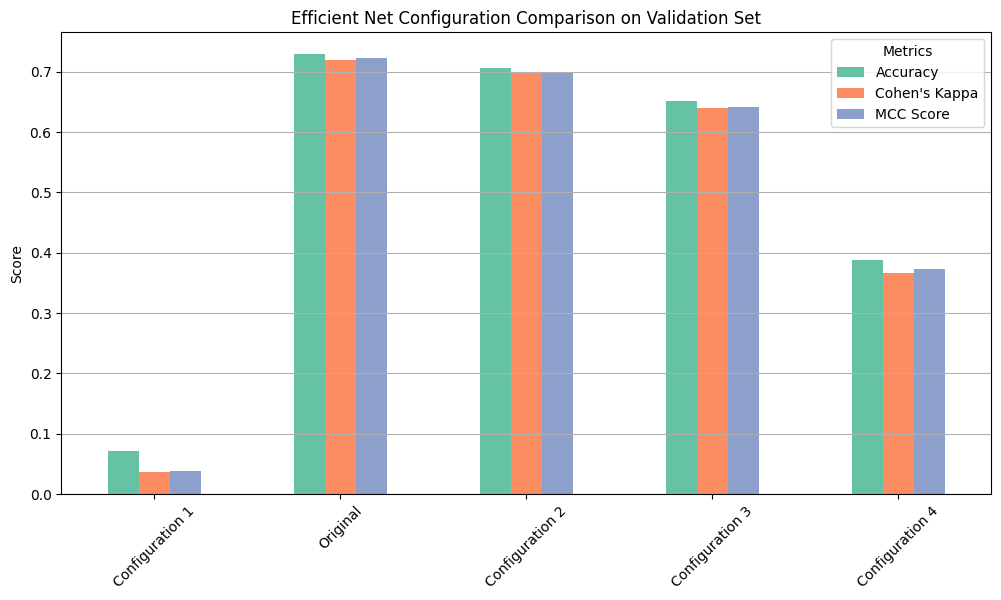

In [48]:
# Plot comparison of Accuracy, Cohen's Kappa, and MCC score
sns.set_palette("Set2")
plt.figure(figsize=(10,6))
results_df = metrics_df[['Accuracy', "Cohen's Kappa", 'MCC Score']]
results_df.plot(kind='bar', figsize=(12,6))
plt.title('Efficient Net Configuration Comparison on Validation Set')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()

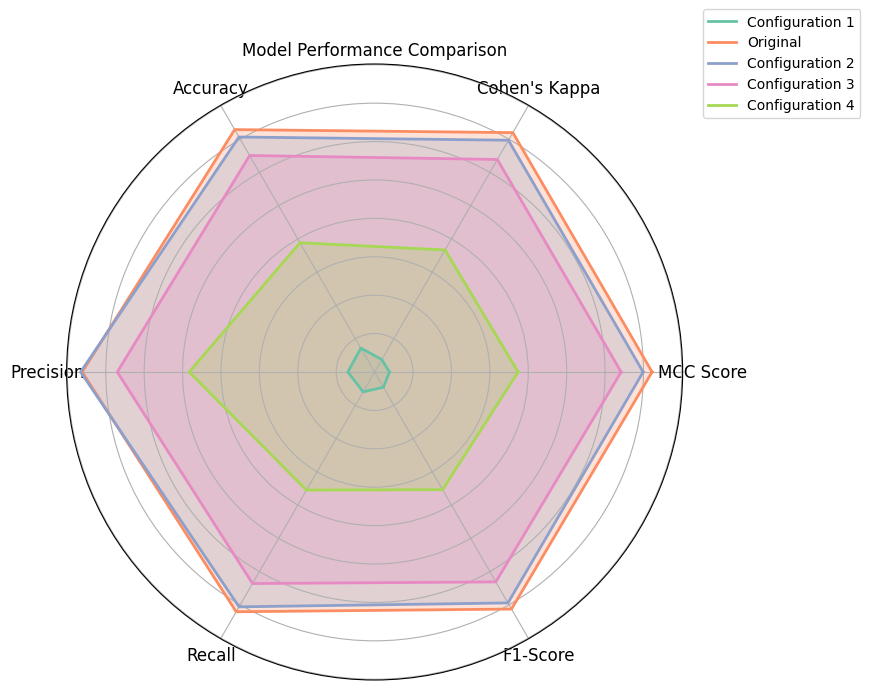

In [49]:
# Radar plot function
def plot_radar_chart(metrics_df):
    labels = metrics_df.columns.tolist()
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * math.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    for model_name, row in metrics_df.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=model_name, linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    plt.title('Model Performance Comparison')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Generate radar plot
plot_radar_chart(metrics_df)

#### Individual Words

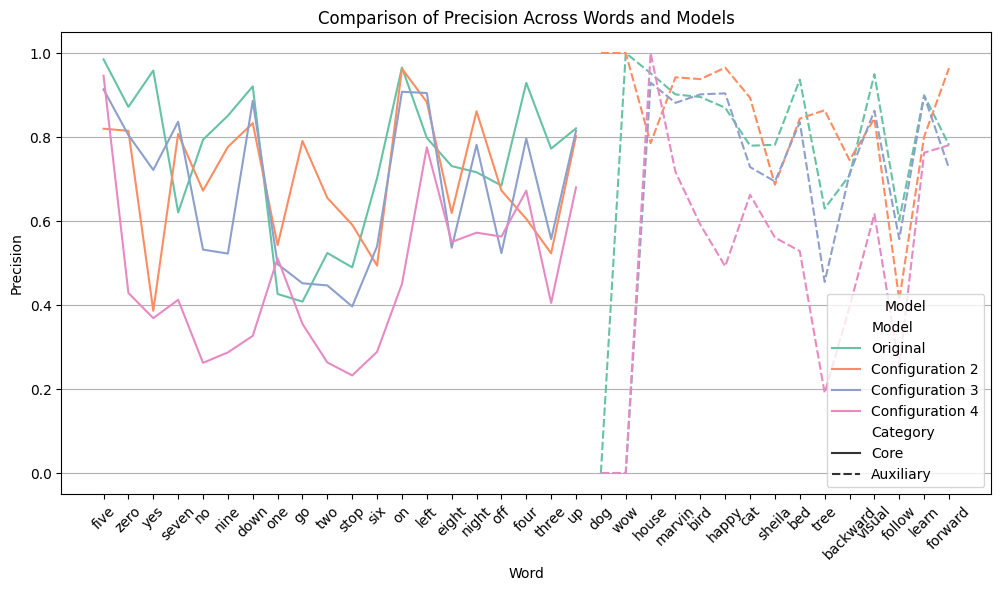

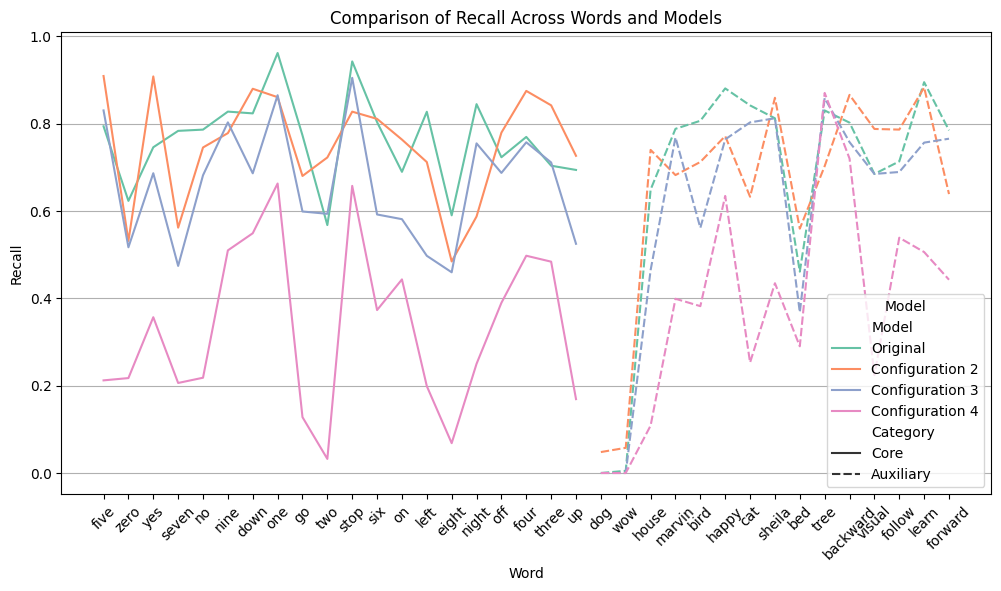

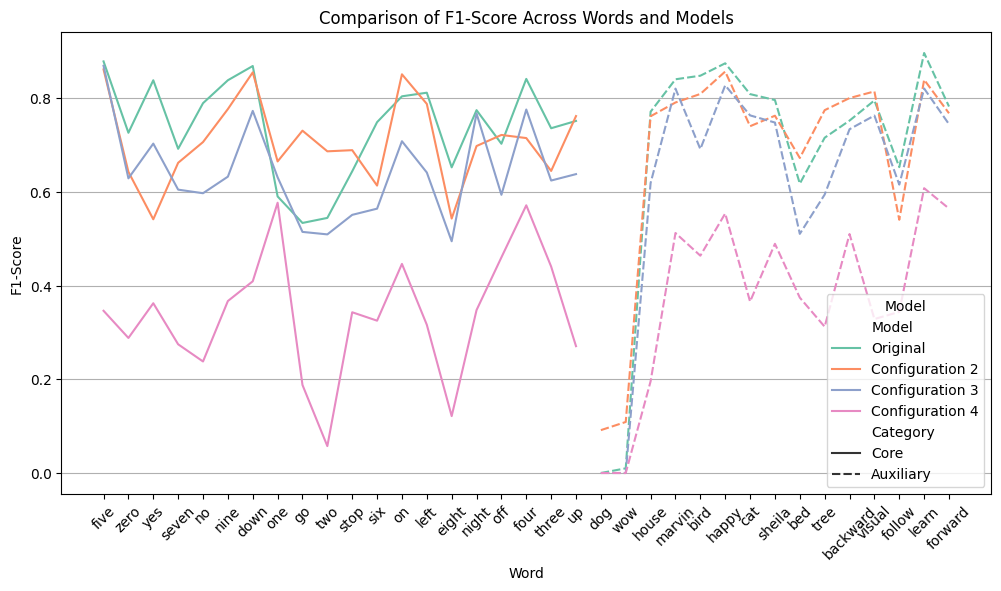

In [50]:
# Plot bar charts for each metric
filtered_df = word_metrics_df[word_metrics_df['Model'] != 'Configuration 1']
metrics_to_plot = ['Precision', 'Recall', 'F1-Score']
for metric in metrics_to_plot:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=filtered_df, x='Word', y=metric, hue='Model', style='Category', dashes=True)
    plt.title(f'Comparison of {metric} Across Words and Models')
    plt.ylabel(metric)
    plt.xlabel('Word')
    plt.xticks(rotation=45)
    plt.legend(title='Model')
    plt.grid(axis='y')
    plt.show()
